In [ ]:
#La función es lineal F = C * 1.8 + 32
#Se parece a y = mx+b

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib as plt

In [4]:
celsius = np.array([-40,-10,0,8,15,22,38], dtype = float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype =float)

In [7]:
#capa = tf.keras.layers.Dense(units=1, input_shape =[1])
#modelo = tf.keras.Sequential([capa])

In [ ]:
'''
Error: error: /opt/anaconda3/envs/mi_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an input_shape/input_dim argument to a layer. When using Sequential models, prefer using an Input(shape) object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
  
Este warning se debe a que estás usando un argumento input_shape o input_dim directamente en una capa Dense dentro de un modelo secuencial. Keras recomienda no hacerlo, sino utilizar un objeto Input como la primera capa en el modelo secuencial.

Solución:
En lugar de especificar el input_shape o input_dim directamente en la capa Dense, crea un Input al inicio del modelo. Aquí te muestro cómo modificarlo:

Usando Input en lugar de input_shape:


from keras.models import Sequential
from keras.layers import Dense, Input

# Crear un modelo secuencial
modelo = Sequential()

# Usar Input para especificar la forma de la entrada
modelo.add(Input(shape=(1,)))  # Aquí defines la forma de la entrada

# Agregar capas densas
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(1))

# Compilar el modelo
modelo.compile(optimizer='adam', loss='mean_squared_error')
'''

In [18]:
#Agrego más capas, units = 3
oculta1 = tf.keras.layers.Dense(units=3, input_shape =[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [19]:
#Colocar las propiedades que quiero evaluar en mi modelo
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [20]:
print("comenzando entrenamiento")
historial = modelo.fit(celsius,fahrenheit, epochs=1000, verbose =False)
print("Modelo entrenado!")

comenzando entrenamiento
Modelo entrenado!


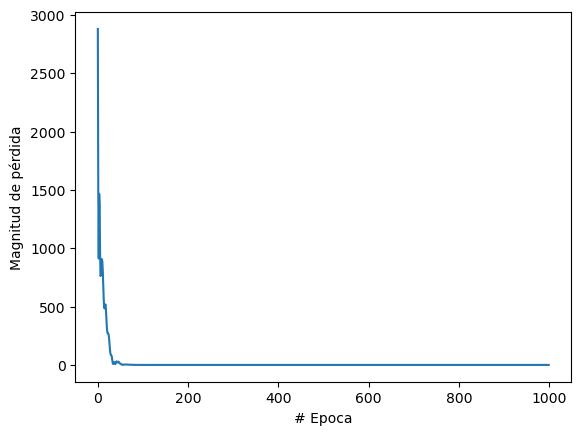

In [21]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [22]:
#Hagamos una predicción
print ("Predicción")
# Convertir la entrada en un array de NumPy
entrada = np.array([[100.0]])  # Se usa doble corchete para representar una entrada con una dimensión correcta, eso es 100 grados centigrados

# Hacer la predicción
resultado = modelo.predict(entrada)
print ("El resultado es" + str(resultado) + "Fahrenheit")

Predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
El resultado es[[211.74745]]Fahrenheit


In [23]:
print("Variables internas del modelo")
#print(capa.get_weights())
#imprime el peso en 1.79 y el sesgo en 31.90 para una sola capa

Variables internas del modelo
[array([[1.7983776]], dtype=float32), array([31.903032], dtype=float32)]


In [24]:
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

[array([[ 0.5976614 , -0.5209523 ,  0.01107241]], dtype=float32), array([ 3.5323699, -3.5872064, -3.344552 ], dtype=float32)]
[array([[-0.52768844, -0.26735073,  0.5776002 ],
       [-0.244091  ,  1.1746912 , -0.20059332],
       [ 0.0139002 ,  0.06304248, -1.2936368 ]], dtype=float32), array([-2.7490907, -3.3710644,  3.3414385], dtype=float32)]
[array([[-0.48519123],
       [-1.44712   ],
       [ 1.3572041 ]], dtype=float32), array([3.3156831], dtype=float32)]
